## Import packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, RidgeCV

## Load Alex's cleaned dataset

In [2]:
iowa_df = pd.read_csv('./train05-23.csv', index_col = 0)
test_df = pd.read_csv('./test.csv')
dropcolumns1 = ['House_Age','Remod_Age','Garage_Age']
iowa_df = iowa_df.drop(columns = dropcolumns1)
dropcolumns2 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','GarageCond','PoolArea','PoolQC','Fence','MiscFeature']
test_df = test_df.drop(columns = dropcolumns2)

## Visualize the dataset. Check the distribution of all the numeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa402ea750>,
      dtype=object)

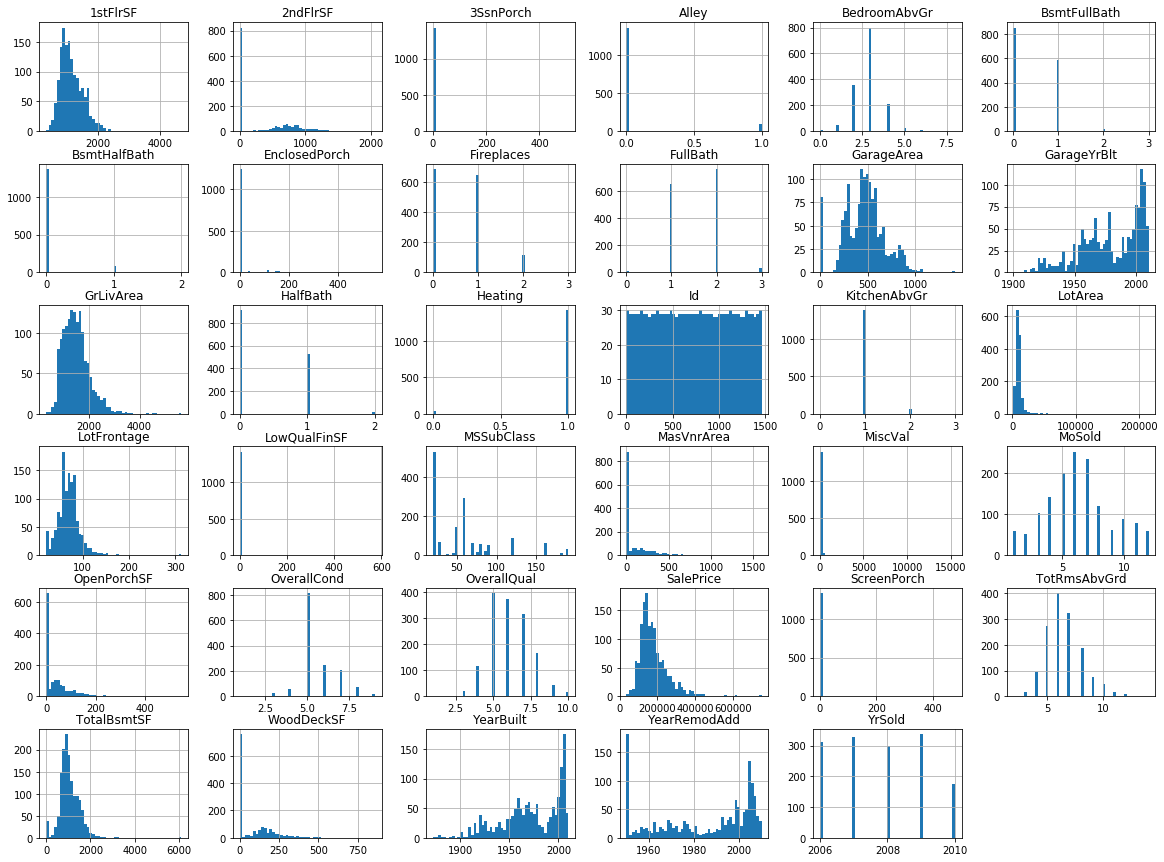

In [3]:
iowa_df.hist(bins=50, figsize=(20,15))

## Descriptive Statistics

In [4]:
pd.options.display.max_columns = 100 

#iowa_df = iowa_df.drop('LotFrontage', 'GarageYrBlt'
iowa_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1194.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1370.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,70.027638,10507.808408,0.062026,6.093728,5.579600,1971.092350,1984.760165,103.75672,1056.310131,0.977946,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.353285,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,24.299302,9992.987081,0.241286,1.381467,1.113415,30.190266,20.651334,181.10815,437.914609,0.146909,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,24.685798,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,59.000000,7537.500000,0.000000,5.000000,5.000000,1954.000000,1966.000000,0.00000,795.000000,1.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,69.000000,9477.000000,0.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,991.000000,1.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,80.000000,11600.000000,0.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,1297.500000,1.000000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,6110.000000,1.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Exploration

### Target Variable - SalePrice

Skewness: 1.883111
Kurtosis: 6.573025


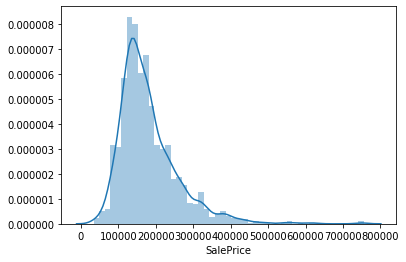

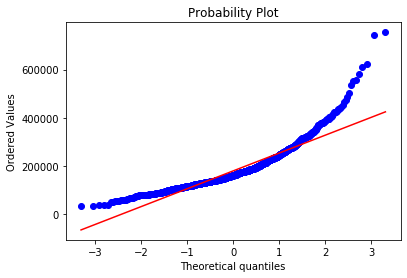

In [5]:
#histogram
sns.distplot(iowa_df['SalePrice']);

#probability plot
fig = plt.figure()
res = stats.probplot(iowa_df['SalePrice'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % iowa_df['SalePrice'].skew())
print("Kurtosis: %f" % iowa_df['SalePrice'].kurt())

In [6]:
#applying log transformation
iowa_df['SalePrice'] = np.log(iowa_df['SalePrice'])

Skewness: 0.121938
Kurtosis: 0.802538


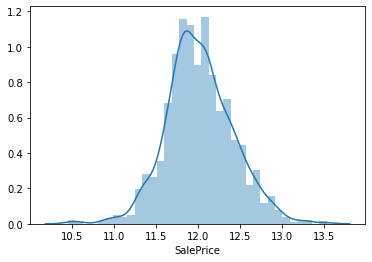

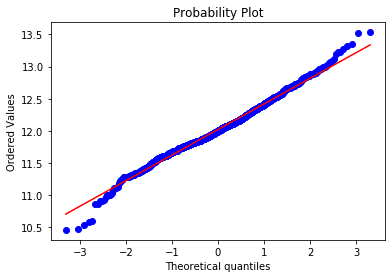

In [7]:
#histogram
sns.distplot(iowa_df['SalePrice']);

#probability plot
fig = plt.figure()
res = stats.probplot(iowa_df['SalePrice'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % iowa_df['SalePrice'].skew())
print("Kurtosis: %f" % iowa_df['SalePrice'].kurt())

### Correlation Heatmap - SalePrice vs Numerical variables

In [8]:
numeric_features = iowa_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

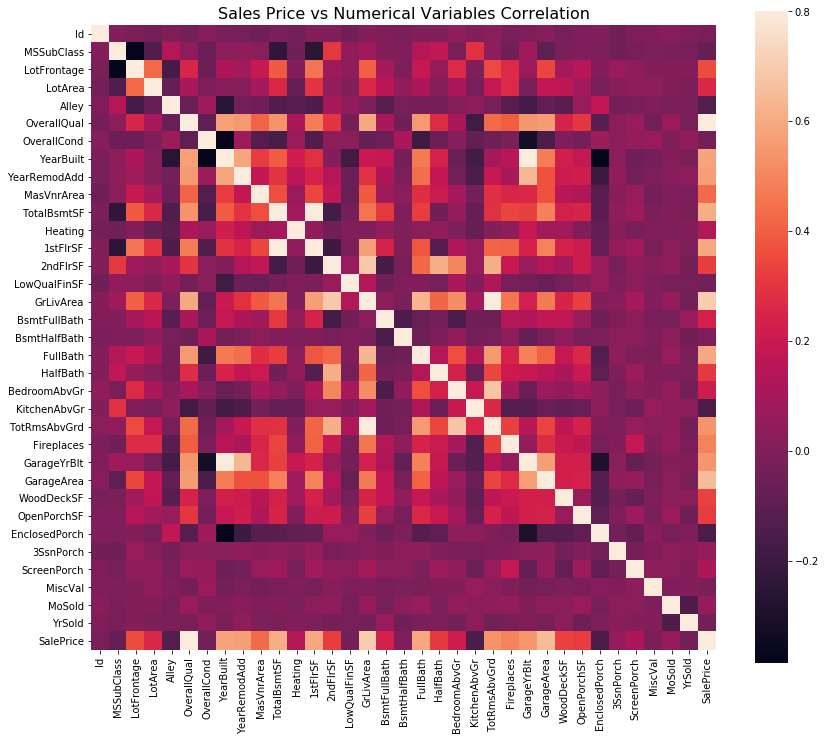

In [9]:

correlation = numeric_features.corr()
f , ax = plt.subplots(figsize = (14,12))
plt.title('Sales Price vs Numerical Variables Correlation',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

### Sales Price Correlation Matrix

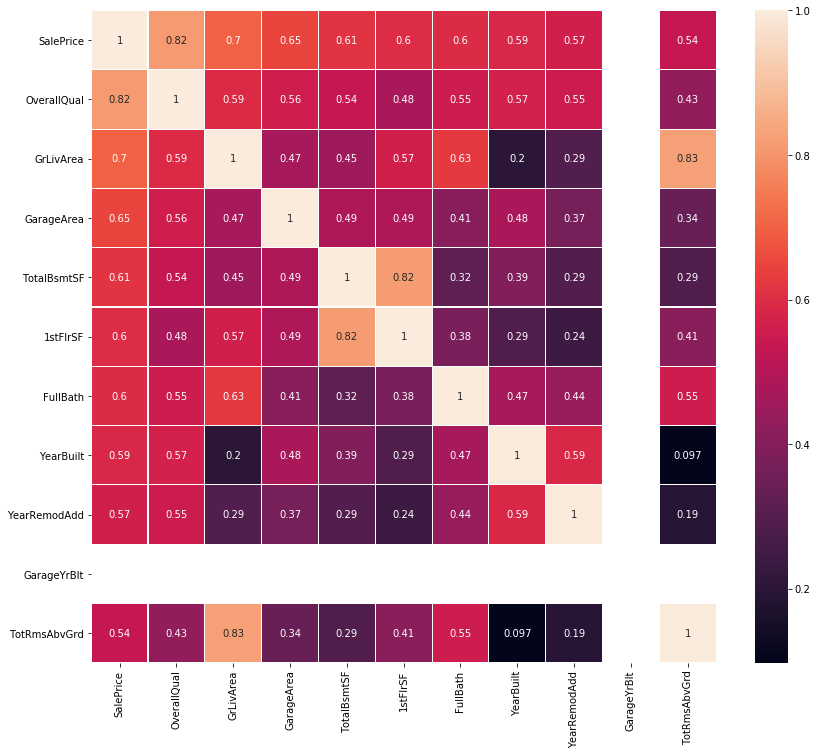

In [10]:
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
matrix = np.corrcoef(iowa_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(matrix, vmax=1, linewidths=0.1,annot=True,xticklabels = cols.values,yticklabels = cols.values)

### PairPlot Visualization - SalePrice vs Numerical variables

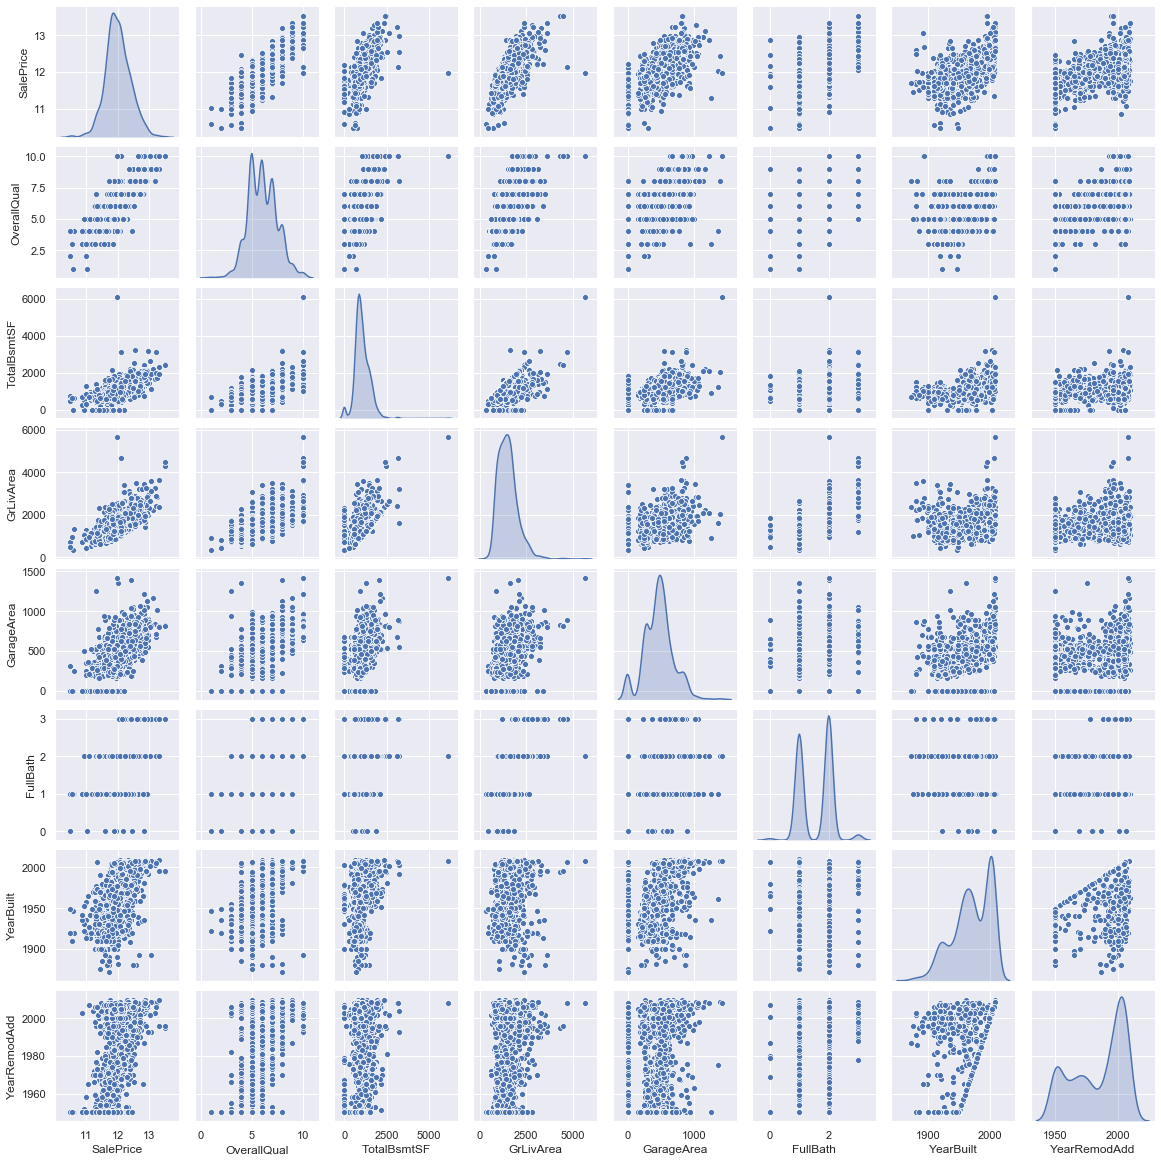

In [11]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(iowa_df[columns], height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

### Year Sold vs Sales Price vs Quality

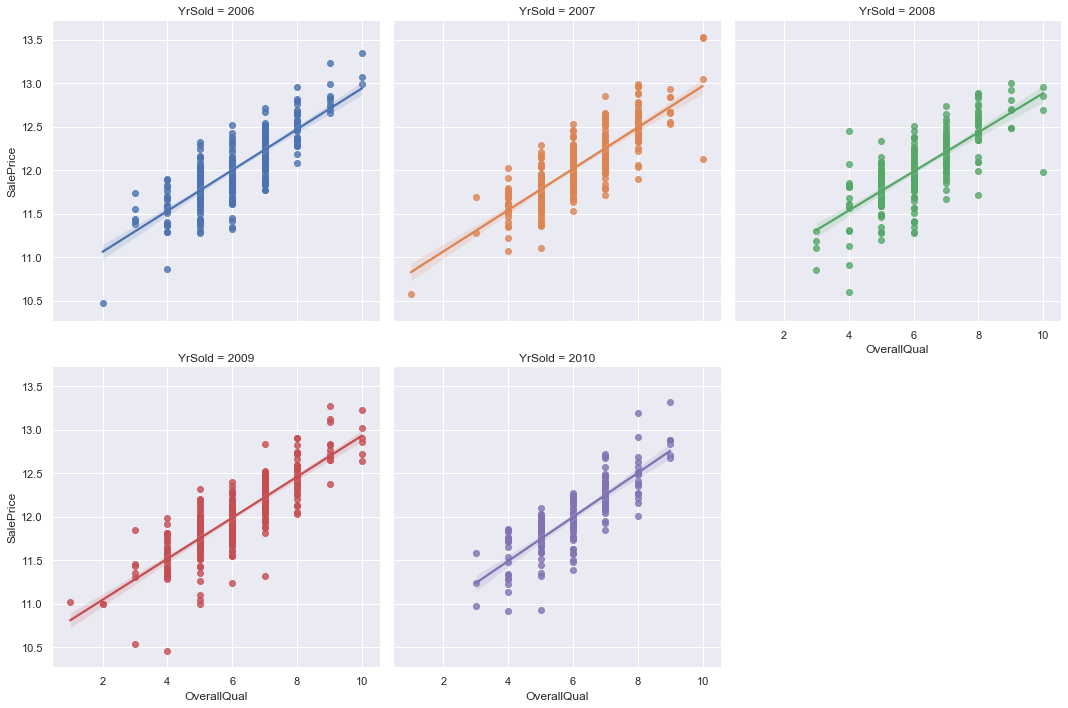

In [12]:
sns.lmplot(y="SalePrice",x="OverallQual", hue="YrSold", col="YrSold", col_wrap=3,height=5,data=iowa_df)

## Preparing the data for Multiple Linear Regression

In [13]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model
train_ID = iowa_df['Id']
test_ID = test_df['Id']
iowa_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

### Feature Engineering

In [15]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})    
    return dict_x

missing = percent_missing(iowa_df)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[:10]

Percent of missing data


[('LotFrontage', 17.71),
 ('GarageYrBlt', 5.58),
 ('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0)]

In [16]:
# Fill missing values
iowa_df['GarageYrBlt'] = iowa_df['GarageYrBlt'].fillna(0)
iowa_df['LotFrontage'] = iowa_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [17]:
missing = percent_missing(iowa_df)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[:3]

Percent of missing data


[('MSSubClass', 0.0), ('MSZoning', 0.0), ('LotFrontage', 0.0)]

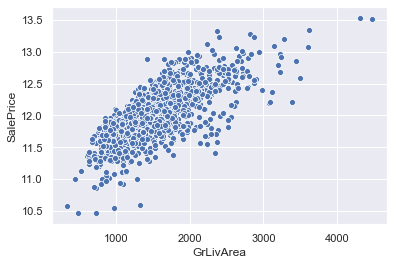

In [39]:
sns.scatterplot(iowa_df['GrLivArea'],iowa_df['SalePrice'])
sns.scatterplot(iowa_df['GrLivArea'],iowa_df['SalePrice'])

In [19]:
# Remove outliers
iowa_df.drop(iowa_df[(iowa_df['GrLivArea']>4500)].index, inplace=True)

# Split features and labels
train_labels = iowa_df['SalePrice'].reset_index(drop=True)
train_features = iowa_df.drop(['SalePrice'], axis=1)
test_features = test_df

# Combine features
all_features = pd.concat([train_features])
all_features.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,1,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,548,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,1,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,1,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,1,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,Unf,796,1,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,480,TA,Y,40,30,0,320,0,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,1686,1,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,636,TA,Y,255,57,0,0,0,0,8,2007,WD,Normal
7,60,RL,80.0,10382,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,1107,1,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,484,TA,Y,235,204,228,0,0,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,Unf,952,1,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,468,Fa,Y,90,0,205,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,991,1,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,205,Gd,Y,0,4,0,0,0,0,1,2008,WD,Normal


In [50]:
train_labels.shape

(1449,)

In [51]:
train_features.shape

(1449, 70)

In [52]:
test_features.shape

(1459, 70)

In [20]:
# Find skewed numerical features
skew_features = all_features.select_dtypes(include=[np.number]).apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print(skew_index)

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(25)

Index(['MiscVal', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr',
       'ScreenPorch', 'BsmtHalfBath', 'Alley', 'EnclosedPorch', 'MasVnrArea',
       'OpenPorchSF', 'LotFrontage', 'WoodDeckSF', 'MSSubClass', 'GrLivArea',
       '1stFlrSF', '2ndFlrSF', 'OverallCond', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'BsmtFullBath', 'TotalBsmtSF'],
      dtype='object')
There are 23 numerical features with Skew > 0.5 :


MiscVal          24.359502
LotArea          12.591763
3SsnPorch        10.253854
LowQualFinSF      8.966866
KitchenAbvGr      4.504598
ScreenPorch       4.099864
BsmtHalfBath      4.081053
Alley             3.628529
EnclosedPorch     3.088074
MasVnrArea        2.683933
OpenPorchSF       2.357909
LotFrontage       1.553865
WoodDeckSF        1.544714
MSSubClass        1.406188
GrLivArea         1.015541
1stFlrSF          0.870967
2ndFlrSF          0.814864
OverallCond       0.691138
HalfBath          0.688622
TotRmsAbvGrd      0.664368
Fireplaces        0.629287
BsmtFullBath      0.597867
TotalBsmtSF       0.509284
BedroomAbvGr      0.218153
MoSold            0.212429
dtype: float64

In [22]:
# Normalize skewed features
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i], boxcox_normmax(all_features[i] + 1))

In [23]:
# List skewed numerical features
skew_features = all_features.select_dtypes(include=[np.number]).apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(14)

There are 15 numerical features with Skew > 0.5 :


3SsnPorch        7.698454
LowQualFinSF     7.358008
MiscVal          5.177295
KitchenAbvGr     3.984736
BsmtHalfBath     3.907857
Alley            3.628529
ScreenPorch      3.311643
EnclosedPorch    2.276546
MasVnrArea       0.944920
2ndFlrSF         0.885044
WoodDeckSF       0.775833
HalfBath         0.723369
OpenPorchSF      0.627217
BsmtFullBath     0.592244
dtype: float64

In [215]:
# Numerically encode categorical features
all_features = pd.get_dummies(all_features).reset_index(drop=True)

# Remove any duplicated column names
all_features = all_features.loc[:,~all_features.columns.duplicated()]

print(all_features.shape)

# Regression training and test set
X = all_features.iloc[:len(train_labels), :]

X.to_csv('x.csv')

# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

# Define error metrics
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

# Ridge Regressor
# alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
n_alphas = 100
alphas = np.logspace(1e-15, 5, n_alphas)

(1449, 269)


In [216]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, train_labels)
    coefs.append(ridge.coef_) 

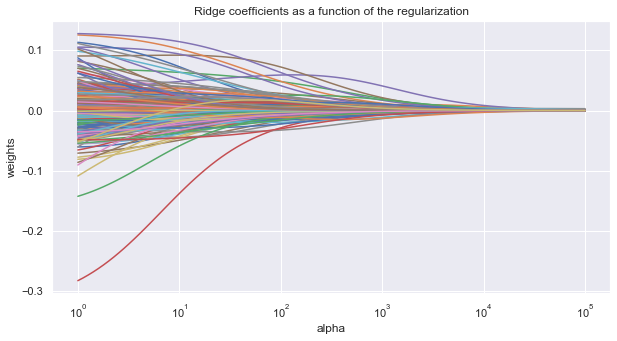

In [217]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [218]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas, cv=kf))

In [219]:
X.shape

(1449, 269)

In [220]:
scores = {}
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge_model_full_data = ridge.fit(X, train_labels)
#ridge: 0.1109 (0.0207)
ridge.score(X, train_labels)
#0.9409292443354214

ridge: 0.1110 (0.0208)


0.941549987598964